# Reinforcement Learning Final Project 

Welcome to your Reinforcement Learning project! Join in groups of a maximum of 5 students on a project focused on developing an RL agent capable of solving an environment for decision-making in Autonomous Driving. The project deadline has been set to the 2nd of June.

Autonomous Driving has long been considered a field in which RL algorithms excel, and this project aims to leverage the power of RL to create an intelligent agent that can solve the Farama’s foundation “highway-env” project, namely the Highway environment (refer to https://highway-env.farama.org/environments/highway/).

## Project Requirements:

* The environments observation’s format can vary according to our preference, namely Kinematics, Grayscale Image, Occupancy grid and Time to collision (refer to https://highway-env.farama.org/observations/). In your solutions you should use 2 of these types.
* The agents actions can also vary, as continuous actions, discrete actions and discrete meta-actions (refer to https://highway-env.farama.org/actions/). In your solutions you should use 2 of these types.
* As for the algorithms to use, any algorithm is valid (seen or not in class), with a minimum requirement of 3 different algorithms used.
* Apart from the environment observation types and agent action types you must use environment’s configuration provided in the annexed notebook!
Note: Your delivery should comprise 4 solutions to the highway environment (corresponding to the combinations of the two environment observation’s types and the two agent’s action types), in which you just need to use one algorithm for each combination (knowing that you need to use at least 3 different algorithms).


## Project Objectives:

* Train an RL agent to solve the Highway environment: The primary objective of this project is to develop an RL agent that can maximize the reward given by the highway environment (refer to https://highway-env.farama.org/rewards/), which leverages to maximize speed while minimizing crash risk! 
* Optimize decision-making using RL algorithms: Explore different RL algorithms to train the agent. Compare and analyse their effectiveness in learning and decision-making capabilities in the context of the environment.
* Explore and expand on the reward system: Although you should evaluate your agent with the reward function provided by the environment, you could/should expand it to better train your agent.
* Enhance interpretability and analysis: Develop methods to analyse the agent's decision-making process and provide insights into its strategic thinking. Investigate techniques to visualize the agent's evaluation of chess positions and understand its reasoning behind specific moves.



### Extra Objectives:

* Investigate transfer learning and generalization: Explore techniques for transfer learning to leverage knowledge acquired in related domains or from pre-training on large chess datasets. Investigate the agent's ability to generalize its knowledge.
* Explore multi agent approaches: The environment allows you to use more than one agent per episode. Explore multi agent alternatives to improve your learning times and overall benchmarks.


## Imports Required

You might need to restart the kernel after installation

In [1]:
!pip install highway-env gymnasium

In [2]:
import gymnasium as gym

import time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm.notebook import tqdm
import cv2
import os

## Environment Configuration

Apart from the environment observation types and agent action types you must use some of the environment’s configurations provided bellow!

In [3]:
""" configuration = {

    # Parametrization bellow cannot be changed
    "lanes_count": 10, # The environment must always have 10 lanes
    "vehicles_count": 50, # The environment must always have 50 other vehicles
    "duration": 120,  # [s] The environment must terminate never before 120 seconds
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle", # This is the policy of the other vehicles
    "initial_spacing": 2, # Initial spacing between vehicles needs to be at most 2

    # Refer to refer to https://highway-env.farama.org/observations/ to change observation space type
    "observation": {
        "type": "Kinematics"
    },

    # Refer to refer to https://highway-env.farama.org/actions/ to change action space type
    "action": {
        "type": "DiscreteMetaAction",
    },

    # Parameterization bellow can be changed (as it refers mostly to the reward system)
    "collision_reward": -1,  # The reward received when colliding with a vehicle. (Can be changed)
    "reward_speed_range": [20, 30],  # [m/s] The reward for high speed is mapped linearly from this range to [0, HighwayEnv.HIGH_SPEED_REWARD]. (Can be changed)
    "simulation_frequency": 15,  # [Hz] (Can be changed)
    "policy_frequency": 1,  # [Hz] (Can be changed)
    
    # Parameters defined bellow are purely for visualiztion purposes! You can alter them as you please
    "screen_width": 800,  # [px]
    "screen_height": 600,  # [px]
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": False,
    "render_agent": True,
    "offscreen_rendering": False
} """

' configuration = {\n\n    # Parametrization bellow cannot be changed\n    "lanes_count": 10, # The environment must always have 10 lanes\n    "vehicles_count": 50, # The environment must always have 50 other vehicles\n    "duration": 120,  # [s] The environment must terminate never before 120 seconds\n    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle", # This is the policy of the other vehicles\n    "initial_spacing": 2, # Initial spacing between vehicles needs to be at most 2\n\n    # Refer to refer to https://highway-env.farama.org/observations/ to change observation space type\n    "observation": {\n        "type": "Kinematics"\n    },\n\n    # Refer to refer to https://highway-env.farama.org/actions/ to change action space type\n    "action": {\n        "type": "DiscreteMetaAction",\n    },\n\n    # Parameterization bellow can be changed (as it refers mostly to the reward system)\n    "collision_reward": -1,  # The reward received when colliding with a vehicle. (

## Example Solution
### Solution 0
Environment Observation Type: **Kinematics** \
Agent Action Type: **DiscreteMetaAction** \
Algorithm Used: **Random**

Example of the environment's usage using a random policy.

In [4]:
""" env = env = gym.make('highway-v0', render_mode='human', config=configuration)

obs, info = env.reset(seed=42)
done = truncated = False

Return = 0
n_steps = 1
Episode = 0
while not (done or truncated):
  # Dispatch the observations to the model to get the tuple of actions
  action = env.action_space.sample()
  # Execute the actions
  next_obs, reward, done, truncated, info = env.step(action)
  Return+=reward

  print('Episode: {}, Step: {}, Return: {}'.format(Episode, n_steps, round(Return,2)))
  n_steps+=1
env.close() """

" env = env = gym.make('highway-v0', render_mode='human', config=configuration)\n\nobs, info = env.reset(seed=42)\ndone = truncated = False\n\nReturn = 0\nn_steps = 1\nEpisode = 0\nwhile not (done or truncated):\n  # Dispatch the observations to the model to get the tuple of actions\n  action = env.action_space.sample()\n  # Execute the actions\n  next_obs, reward, done, truncated, info = env.step(action)\n  Return+=reward\n\n  print('Episode: {}, Step: {}, Return: {}'.format(Episode, n_steps, round(Return,2)))\n  n_steps+=1\nenv.close() "

### Solution 1
Environment Observation Type: \
Agent Action Type: \
Algorithm Used: 

In [5]:
configuration = {
    "lanes_count": 10,
    "vehicles_count": 50,
    "duration": 120,
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "initial_spacing": 2,
    "observation": {
        "type": "OccupancyGrid"  # Using Occupancy Grid for discretized observations
    },
    "action": {
        "type": "DiscreteMetaAction"  # Using Discrete Meta Actions
    },
    "collision_reward": -1,
    "reward_speed_range": [20, 30],
    "simulation_frequency": 15,
    "policy_frequency": 1,
    "screen_width": 800,
    "screen_height": 600,
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": False,
    "render_agent": True,
    "offscreen_rendering": False
}

env = gym.make('highway-v0', render_mode='human', config=configuration)


In [6]:
class QLearningAgent:
    def __init__(self, action_space, learning_rate=0.1, discount_factor=0.99, exploration_rate=1.0, exploration_decay=0.99):
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.q_table = defaultdict(lambda: np.zeros(action_space.n))

    def choose_action(self, state):
        if np.random.rand() < self.exploration_rate:
            return self.action_space.sample()
        else:
            return np.argmax(self.q_table[state])

    def update_q_value(self, state, action, reward, next_state, done):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_factor * self.q_table[next_state][best_next_action] * (1 - done)
        td_delta = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * td_delta
        if done:
            self.exploration_rate *= self.exploration_decay

    def discretize_state(self, obs):
        # Convert the observation (Occupancy Grid) into a hashable state
        return tuple(map(tuple, obs[0]))  # Assuming the first dimension is 1

agent = QLearningAgent(env.action_space)


In [7]:
def train_agent(agent, env, n_episodes=100, max_steps=200):
    returns = []

    for episode in tqdm(range(n_episodes)):
        obs, info = env.reset()
        state = agent.discretize_state(obs)
        total_reward = 0
        done = truncated = False

        for step in range(max_steps):
            action = agent.choose_action(state)
            next_obs, reward, done, truncated, info = env.step(action)
            next_state = agent.discretize_state(next_obs)
            agent.update_q_value(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

            if done or truncated:
                break

        returns.append(total_reward)
        print(f'Episode {episode + 1}/{n_episodes}, Total Reward: {total_reward}')

    return returns

  0%|          | 0/100 [00:00<?, ?it/s]

Episode 1/100, Total Reward: 15.469223917113096
Episode 2/100, Total Reward: 7.903657589662035
Episode 3/100, Total Reward: 16.690678412642583
Episode 4/100, Total Reward: 6.081503469846561
Episode 5/100, Total Reward: 1.5816714829422627
Episode 6/100, Total Reward: 10.536318257111228
Episode 7/100, Total Reward: 1.9350527579143448
Episode 8/100, Total Reward: 22.779006143137188
Episode 9/100, Total Reward: 4.406963574169743
Episode 10/100, Total Reward: 36.82314983742398
Episode 11/100, Total Reward: 7.220411009376247
Episode 12/100, Total Reward: 5.86362586719475
Episode 13/100, Total Reward: 4.008341607953387
Episode 14/100, Total Reward: 8.939176393874508
Episode 15/100, Total Reward: 3.4668828616508502
Episode 16/100, Total Reward: 2.7350527579143447
Episode 17/100, Total Reward: 5.5602275483283155
Episode 18/100, Total Reward: 13.112612161382431
Episode 19/100, Total Reward: 2.853603711746298
Episode 20/100, Total Reward: 2.232218207159155
Episode 21/100, Total Reward: 0.77093324

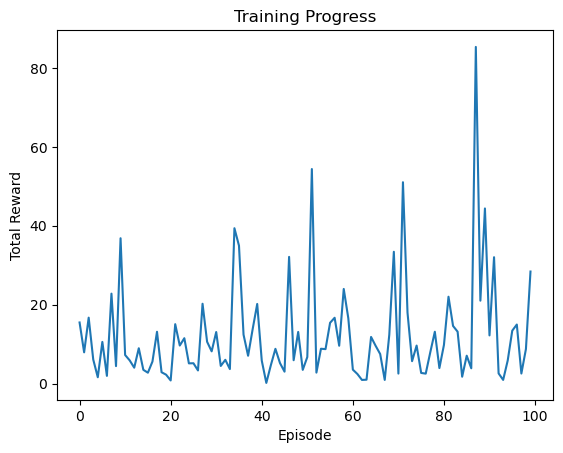

In [8]:
returns = train_agent(agent, env)

plt.plot(returns)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Progress')
plt.show()

In [10]:
visualize_agent(agent, env)

AttributeError: 'QLearningAgent' object has no attribute 'epsilon_greedy_policy'

### Solution 2
Environment Observation Type: \
Agent Action Type: \
Algorithm Used: 

### Solution 2
Environment Observation Type: \
Agent Action Type: \
Algorithm Used: 

## Solution 3
Environment Observation Type: \
Agent Action Type: \
Algorithm Used: 

## Solution 4
Environment Observation Type: \
Agent Action Type: \
Algorithm Used: 